In [1]:
# importing libraries to load Dataset

In [2]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('loanstatus.csv')

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
# Now Checking The Datatypes in Dataset

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
# Checking for Null Values

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# There are Null Values present in our Data Set

In [10]:
# Now Checking the duplicate values

In [11]:
df.duplicated().value_counts()

False    614
dtype: int64

In [13]:
# So No duplicate values are present

In [14]:
# Removing Null Values using Simple Imputer

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
sime=SimpleImputer(strategy='mean')
simo=SimpleImputer(strategy='most_frequent')

In [17]:
list1=['Gender','Married','Dependents','Self_Employed']
list2=['LoanAmount','Loan_Amount_Term','Credit_History']
for i in list1:
    df[i]=simo.fit_transform(df[i].values.reshape(-1,1))
for i in list2:
    df[i]=sime.fit_transform(df[i].values.reshape(-1,1))

In [18]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
# Now Null Values are imputed from our Dataset

In [20]:
# Now CHecking Duplicate Values

In [21]:
df.duplicated().value_counts()

False    614
dtype: int64

In [22]:
# So There are no duplicate values present in our Dataset

In [23]:
# Now lets apply Label Encoder to convert obj Data type into int Datatype

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()

In [26]:
list3=['Gender','Married','Dependents','Self_Employed','Loan_ID','Education','Property_Area','Loan_Status']
for i in list3:
    df[i]=le.fit_transform(df[i].astype(str))

In [27]:
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [28]:
# Now all our columns are in int and float Datatype

In [29]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [30]:
# Now lets see statistical summary of Dataset

In [31]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [128]:
# Now Lets see Correlation

In [32]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


In [33]:
df.corr()['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540483
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Loan_ID              0.011773
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

In [34]:
# Now importing some libraries for visualisation of Data

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

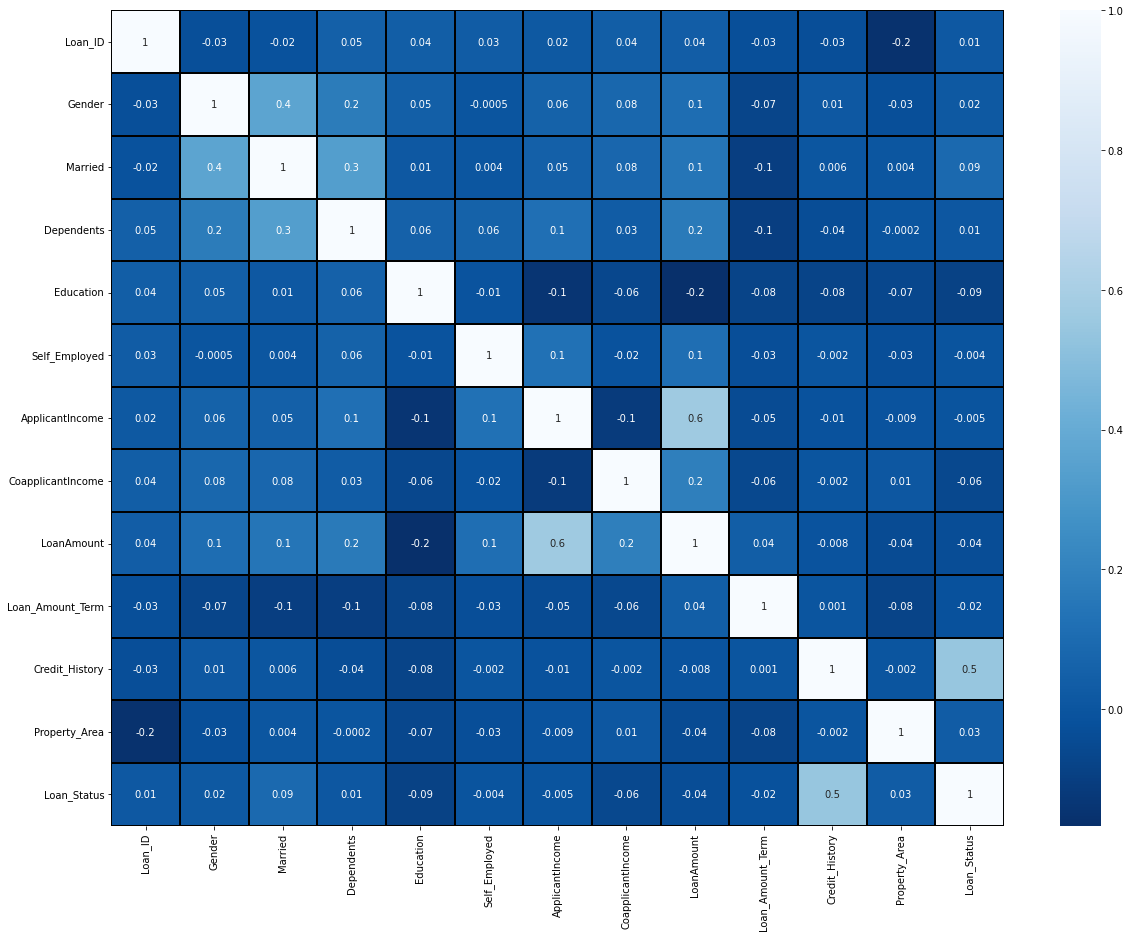

In [36]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = ".1g", linecolor= "black" ,annot=True,cmap="Blues_r")
plt.yticks(rotation=0)
plt.show()

In [50]:
# Univariate Analysis

1    422
0    192
Name: Loan_Status, dtype: int64


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

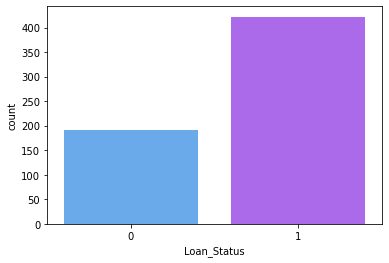

In [39]:
print(df['Loan_Status'].value_counts())
sns.countplot(df['Loan_Status'],palette='cool')

In [40]:
# We Can clearly see that data is imbalanced and a bancing technique is required to be applied

<AxesSubplot:xlabel='Married', ylabel='count'>

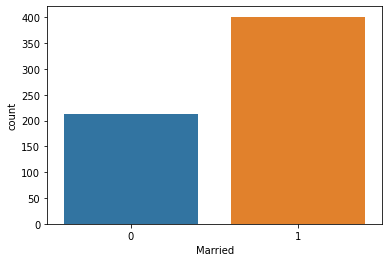

In [41]:
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

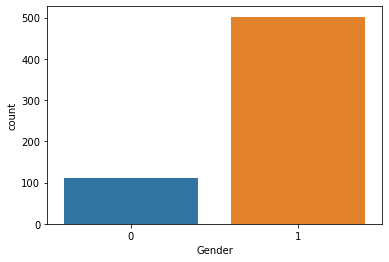

In [42]:
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Loan_ID', ylabel='count'>

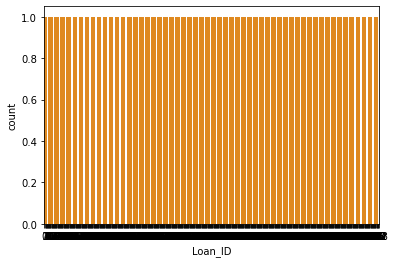

In [43]:
sns.countplot(df['Loan_ID'],color='darkorange')

In [51]:
# Bivariate Analysis

<AxesSubplot:xlabel='Education', ylabel='Count'>

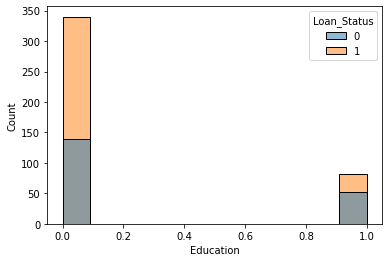

In [52]:
sns.histplot(x='Education',data=df,hue='Loan_Status')

In [53]:
# People Who are More Educated are getting Loans more than people who are less Educated

<AxesSubplot:xlabel='Loan_Status', ylabel='Count'>

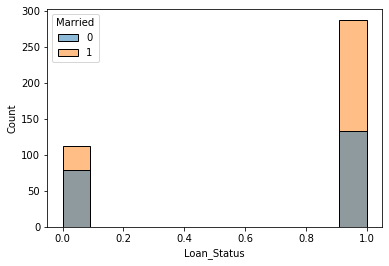

In [54]:
sns.histplot(x='Loan_Status',data=df,hue='Married')

In [55]:
# Married People Getting more Loans than unmarried people

<AxesSubplot:xlabel='Dependents', ylabel='Count'>

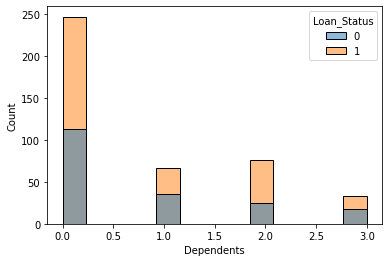

In [56]:
sns.histplot(x='Dependents',data=df,hue='Loan_Status')

In [57]:
# So People having 0 dependants are having more loans followed by people having 2 and 1 dependents and people having 3+ dependents are getting least Loans

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

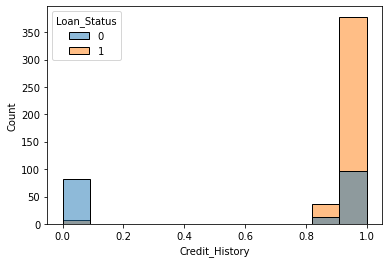

In [58]:
sns.histplot(x='Credit_History',data=df,hue='Loan_Status')

In [59]:
# So People having a good credit history are having a Higher Chance for Loan Than people not having creditHistory

<AxesSubplot:xlabel='Self_Employed', ylabel='Count'>

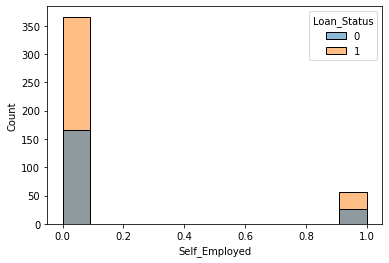

In [60]:
sns.histplot(x='Self_Employed',data=df,hue='Loan_Status')

In [61]:
# Self Employed people has less chance of Loan Approval than Non self Employed people

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

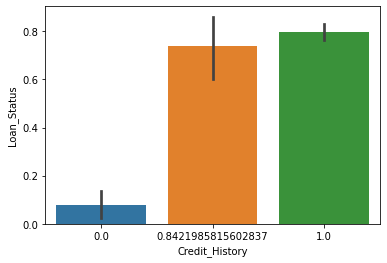

In [63]:
sns.barplot(y='Loan_Status',x='Credit_History',data=df)

In [64]:
# So People having credit history have more chance of loan approval than people having no credit History

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Status'>

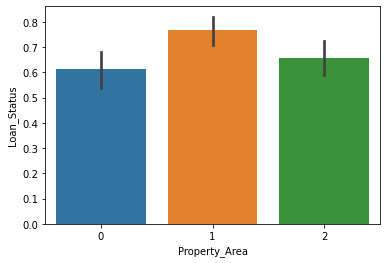

In [65]:
sns.barplot(y='Loan_Status',x='Property_Area',data=df)

In [66]:
# 2=urban
# 0=rural
# 1=Semiurban

# So People of Semiurban have higher chance for Loan_approval followed by urban and then rural people 

<AxesSubplot:xlabel='Self_Employed', ylabel='Loan_Status'>

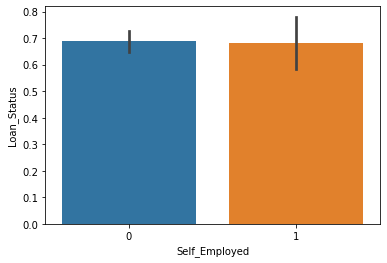

In [67]:
sns.barplot(y='Loan_Status',x='Self_Employed',data=df)

In [68]:
# People who are not self Employed have slightly higher chance of loan approval than people  who are self employed 

In [69]:
# Now Writing a programme to check the distribution function

In [70]:
# Multivariate Analysis

<Figure size 5760x5760 with 0 Axes>

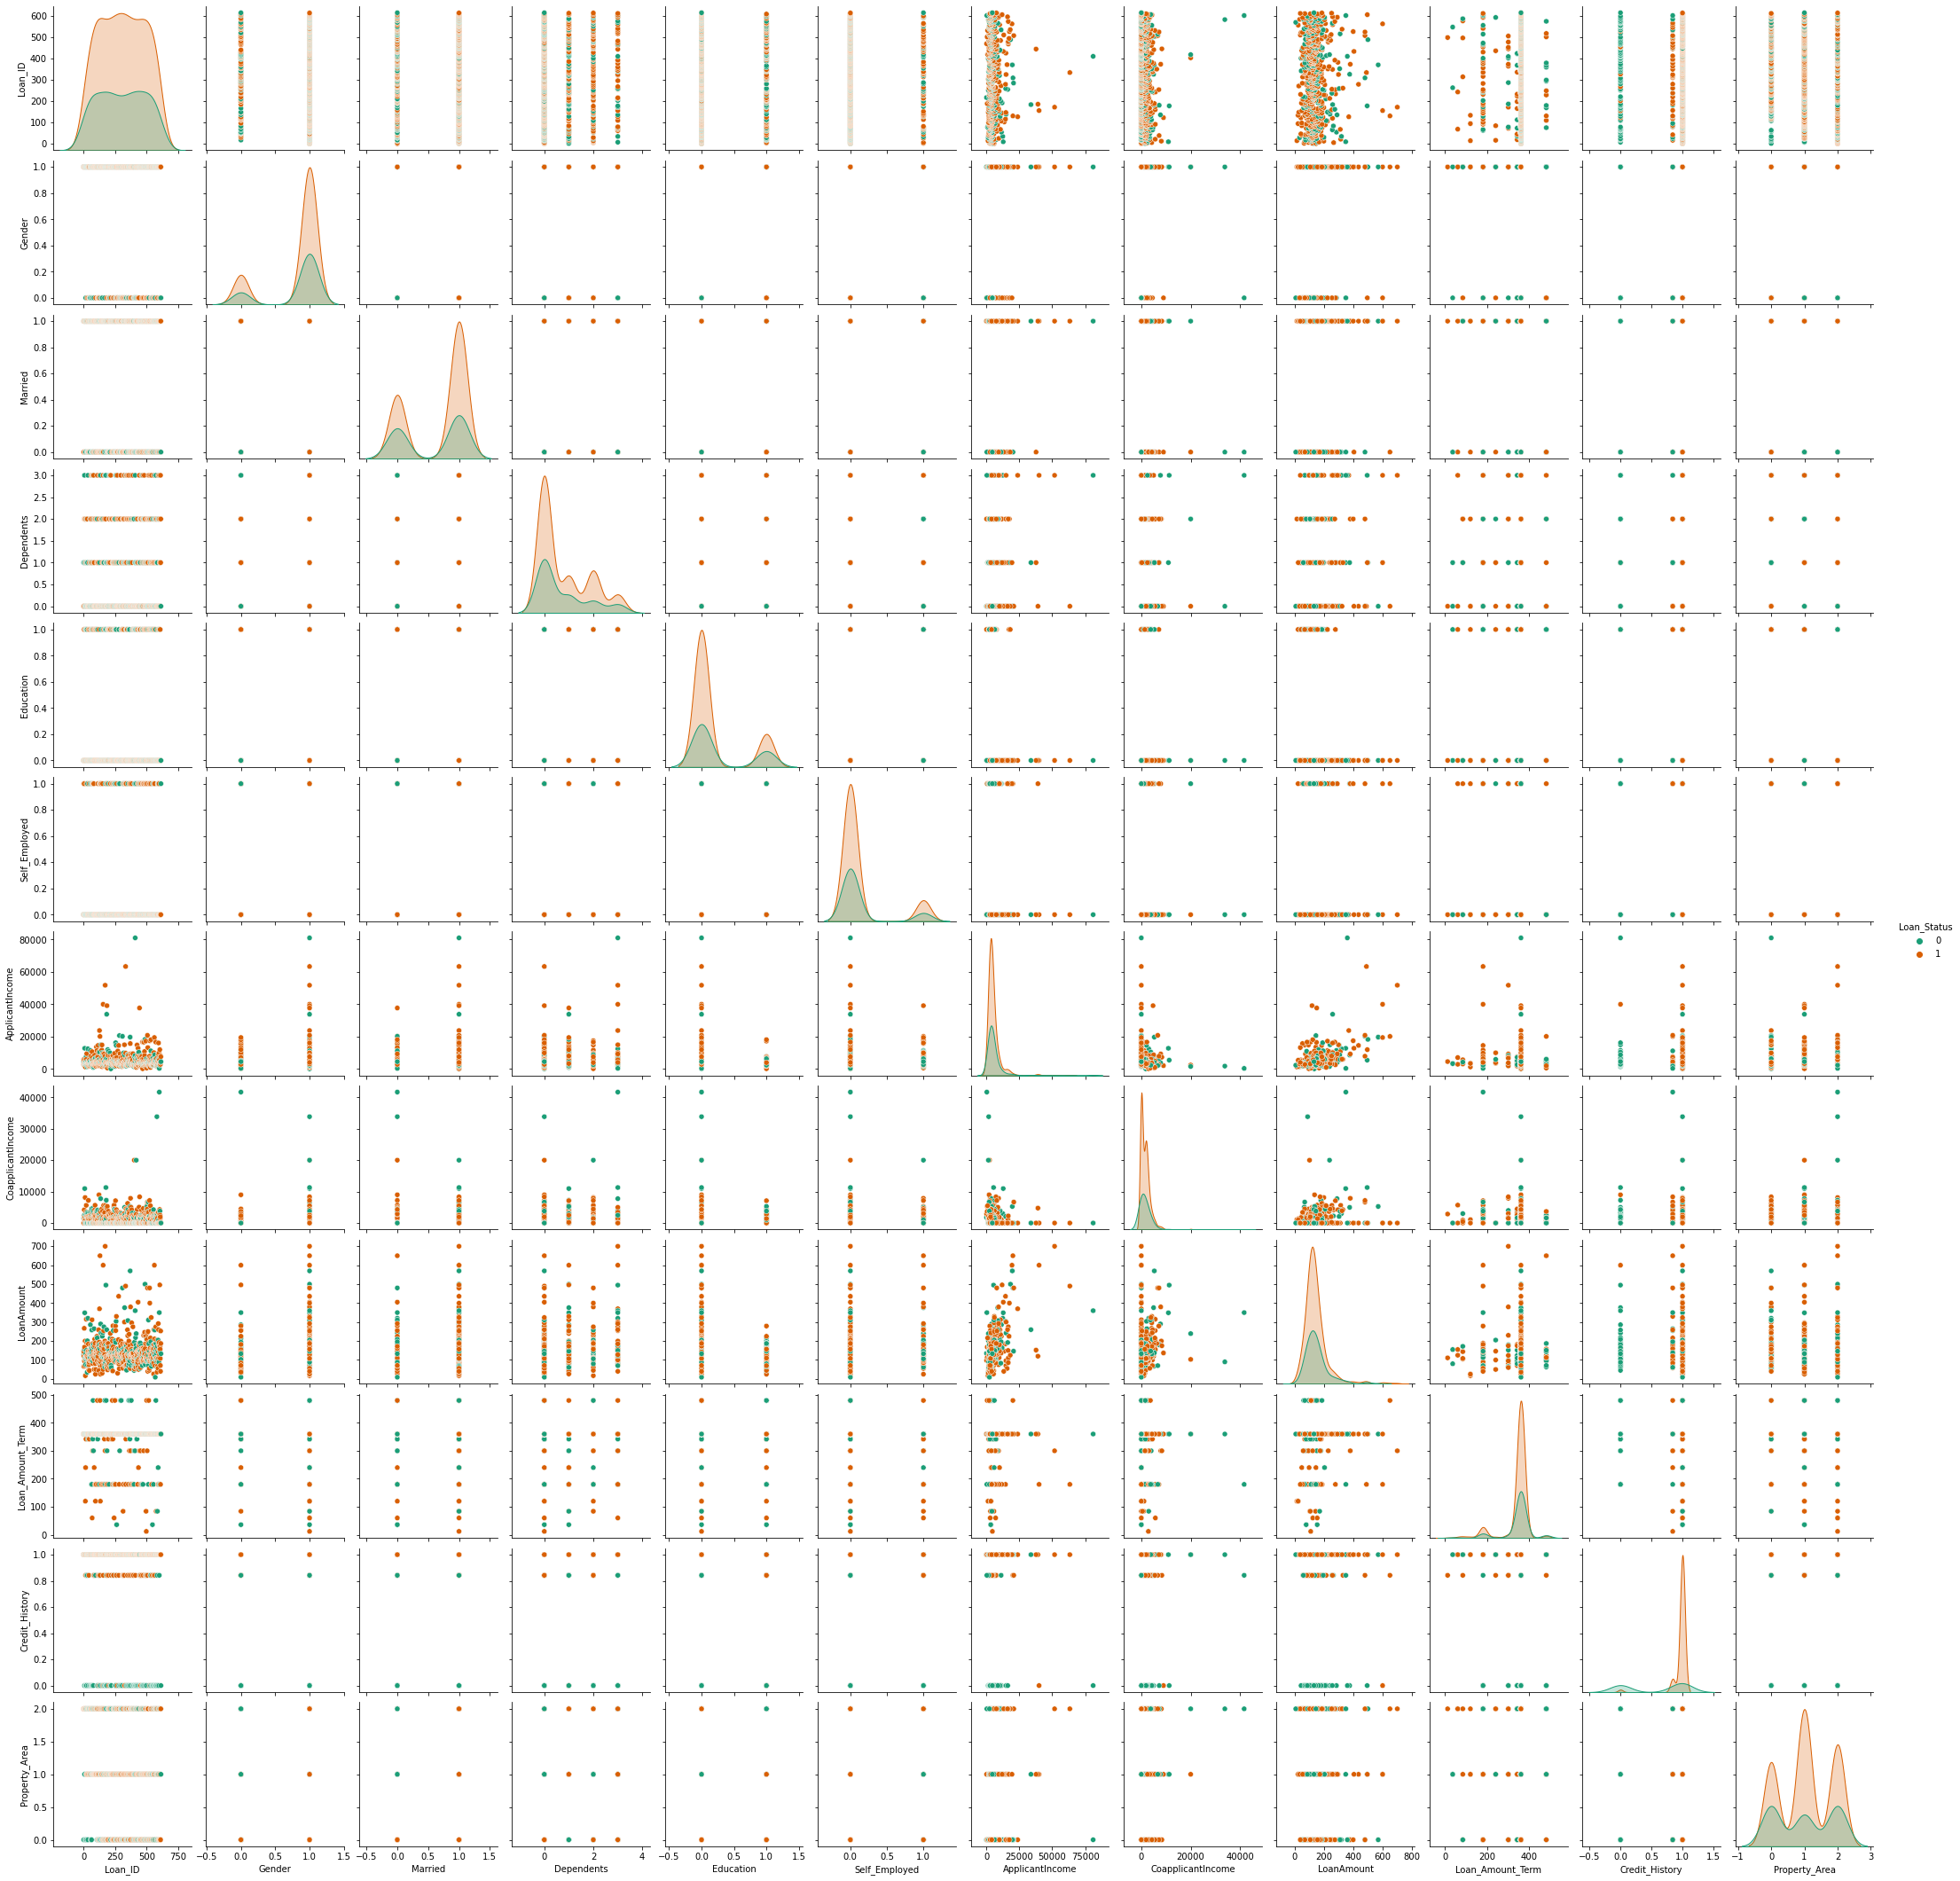

In [71]:
plt.figure(figsize=(80,80))
sns.pairplot(df,hue='Loan_Status',palette='Dark2')
plt.show()

In [72]:
# Checking the distribution of Data

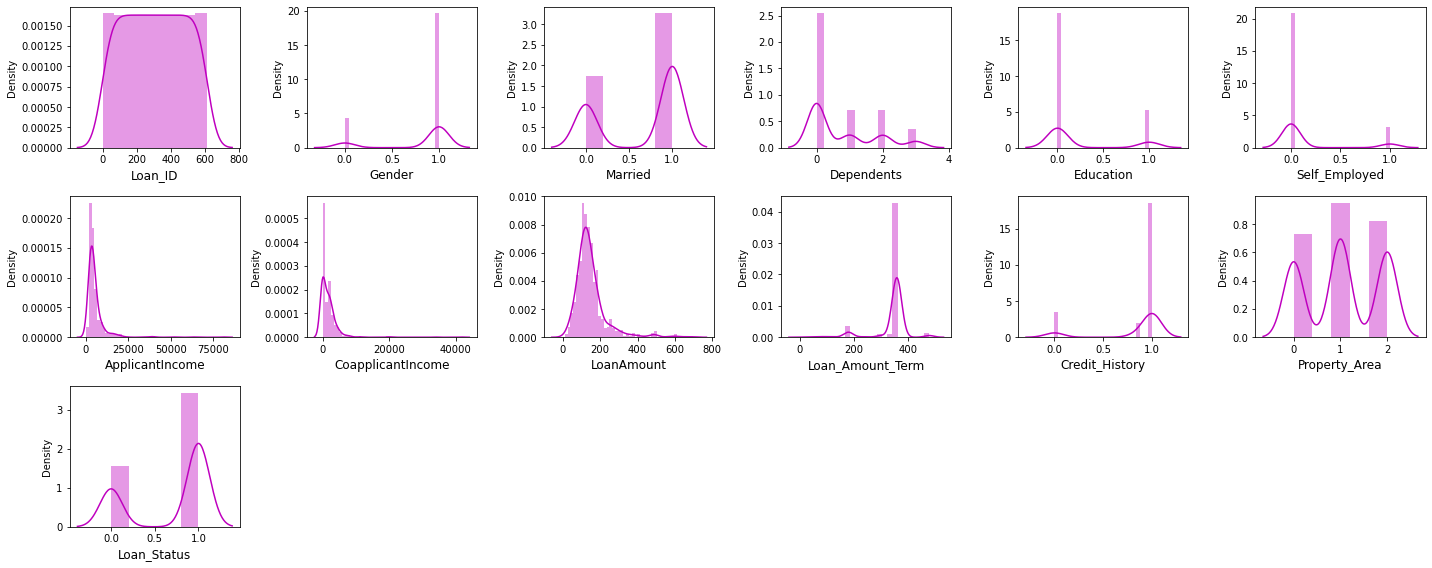

In [77]:
plt.figure(figsize=(20,8),facecolor="White")
plotnumber=1
for i in df.columns:
    if plotnumber<=14:
        ax=plt.subplot(3,6,plotnumber)
        sns.distplot(df[i],color='m')
        plt.xlabel(i,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [74]:
# From above Graphs we can see that some columns are not normally distributed and some skewness is also present

In [76]:
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [78]:
# Visualizing Outliers

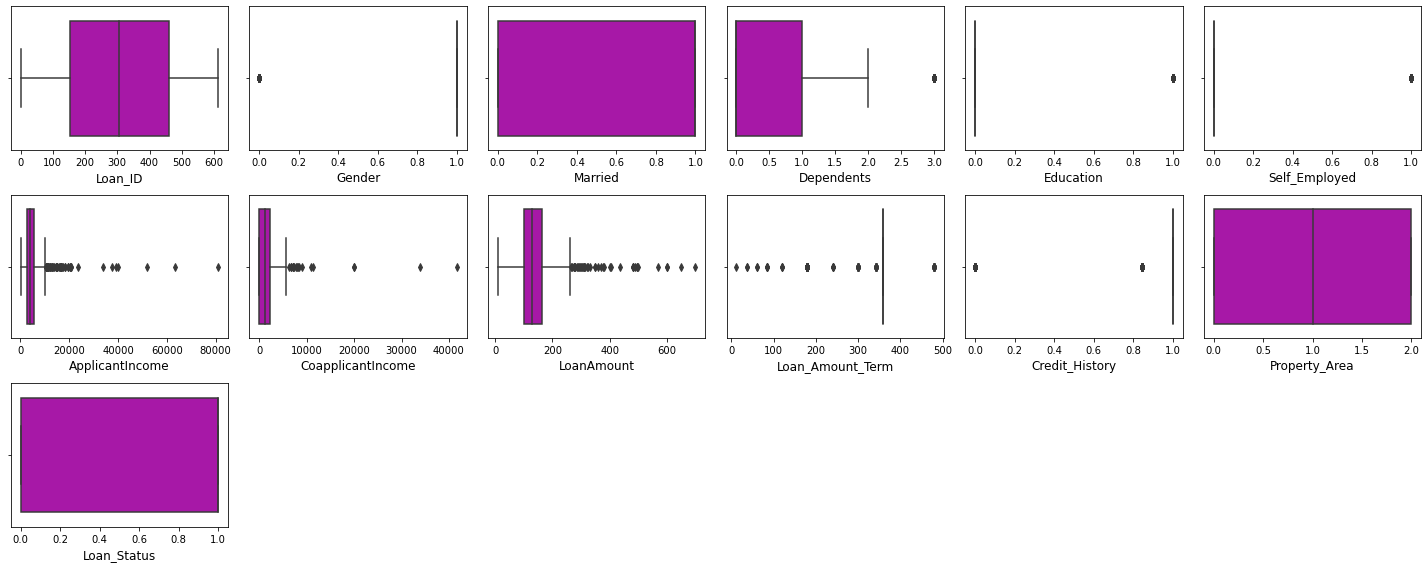

In [79]:
plt.figure(figsize=(20,8),facecolor="White")
plotnumber=1
for i in df.columns:
    if plotnumber<=14:
        ax=plt.subplot(3,6,plotnumber)
        sns.boxplot(df[i],color='m')
        plt.xlabel(i,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [80]:
# So it is clear that there are some outliers present

In [81]:
# Now Removing these outliers using ZScore

In [82]:
from scipy.stats import zscore

In [83]:
z=np.abs(zscore(df))

In [84]:
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([7, 9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 9, 6, 8,
        8, 7, 6, 7, 8, 6, 8, 9, 9, 8, 8, 8, 9, 8, 9, 7, 9, 7, 8],
       dtype=int64))

In [85]:
df=df[(z<3).all(axis=1)]

In [86]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [87]:
# Now Lets CHeck DataLoss Percentage

In [88]:
loss_per=(614-577)/614*100

In [89]:
print(' Data Loss is',loss_per,'Percent')

 Data Loss is 6.026058631921824 Percent


In [90]:
# So only 6 percent Data is lost after removing Outliers

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

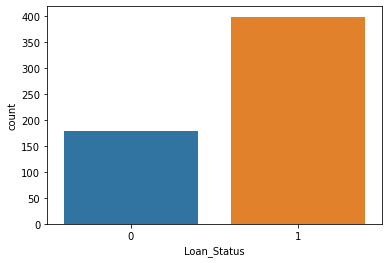

In [91]:
sns.countplot(df['Loan_Status'])

In [92]:
# Clearly we can see that our Data is Imbalanced and balancing is required

In [119]:
x=df.iloc[:,:12]

In [120]:
x.shape

(577, 12)

In [121]:
y=df.iloc[:,12]

In [122]:
y.shape

(577,)

In [123]:
from imblearn.over_sampling import SMOTE

In [124]:
smt=SMOTE()

In [125]:
x,y=smt.fit_resample(x,y)

In [126]:
x.shape

(796, 12)

In [127]:
y.shape

(796,)

In [128]:
# Now our Dataset is Balanced

In [129]:
from sklearn.feature_selection import mutual_info_classif

In [130]:
mutual_info=mutual_info_classif(x,y)
mutual_info

array([0.02202114, 0.        , 0.05281359, 0.00713785, 0.        ,
       0.        , 0.04559149, 0.03162856, 0.06928055, 0.05872671,
       0.23261488, 0.        ])

In [131]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x.columns
mutual_info.sort_values(ascending=False)

Credit_History       0.232615
LoanAmount           0.069281
Loan_Amount_Term     0.058727
Married              0.052814
ApplicantIncome      0.045591
CoapplicantIncome    0.031629
Loan_ID              0.022021
Dependents           0.007138
Gender               0.000000
Education            0.000000
Self_Employed        0.000000
Property_Area        0.000000
dtype: float64

In [132]:
#Visualizing the feature relevent to target 

<AxesSubplot:>

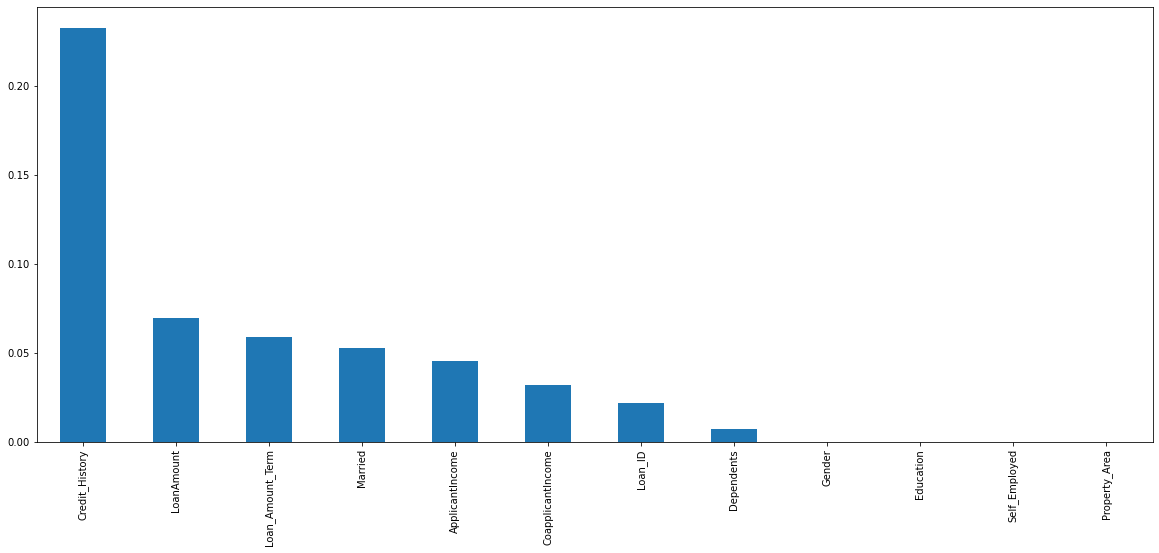

In [133]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [134]:
# We can clearly see that Loan_ID, Gender and Education is irrelvent for the target as they do not contribute anything to the 
#target so we will drop them

In [135]:
x.drop(['Loan_ID','Gender','Education'],axis=1,inplace=True)

In [136]:
# Now Lets Check for multi collinearity

In [137]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [138]:
def cal_vif(x):
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return (vif)

In [139]:
cal_vif(x)

,Variables,VIF
0,Married,2.928672
1,Dependents,1.701274
2,Self_Employed,1.181095
3,ApplicantIncome,5.821219
4,CoapplicantIncome,2.559295
5,LoanAmount,12.843635
6,Loan_Amount_Term,10.645560
7,Credit_History,4.497919
8,Property_Area,2.371904


In [107]:
# There is multicollinearity in 2 columns which are LoanAmount and Loan_Amount_Term so removing them and again 
#check multicollinearity

In [141]:
x.drop(['LoanAmount'],axis=1,inplace=True)

In [142]:
cal_vif(x)

,Variables,VIF
0,Married,2.923053
1,Dependents,1.673594
2,Self_Employed,1.181066
3,ApplicantIncome,3.849392
4,CoapplicantIncome,1.918959
5,Loan_Amount_Term,8.380333
6,Credit_History,4.497914
7,Property_Area,2.370791


In [144]:
# Now our Data doesnot suffer multi collinearity

In [145]:
# Now Lets Check for skewness

In [146]:
x.skew()

Married             -0.347463
Dependents           1.197911
Self_Employed        2.758242
ApplicantIncome      2.181989
CoapplicantIncome    1.301507
Loan_Amount_Term    -2.063218
Credit_History      -1.166475
Property_Area        0.125644
dtype: float64

In [147]:
# Now Removing Skewness using Power Transform

In [148]:
from sklearn.preprocessing import power_transform

In [149]:
x_new=power_transform(x)

In [150]:
pd.DataFrame(x_new,columns=x.columns).skew().sort_values(ascending=False)

Self_Employed        2.758242
Loan_Amount_Term     0.685633
Dependents           0.555933
ApplicantIncome      0.011893
Property_Area       -0.091829
CoapplicantIncome   -0.117446
Married             -0.347463
Credit_History      -0.921669
dtype: float64

In [151]:
x=pd.DataFrame(x_new,columns=x.columns)

In [152]:
# Now Applying Scaling technique

In [153]:
from sklearn.preprocessing import StandardScaler

In [154]:
ss=StandardScaler()

In [155]:
x=ss.fit_transform(x)

In [156]:
# Now Our EDA is complete and lets move ahead toward model Building with first model logistic regression

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,f1_score,roc_auc_score

In [158]:
# Now finding best random state

In [159]:
lr=LogisticRegression()

In [160]:
for i in range(0,100):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(xtrain,ytrain)
    predlr=lr.predict(xtest)
    lracc=accuracy_score(ytest,predlr)
    print('At Random State ',i,' Accuracy is ',lracc*100)

At Random State  0  Accuracy is  77.5
At Random State  1  Accuracy is  78.75
At Random State  2  Accuracy is  78.125
At Random State  3  Accuracy is  76.25
At Random State  4  Accuracy is  75.0
At Random State  5  Accuracy is  75.625
At Random State  6  Accuracy is  76.25
At Random State  7  Accuracy is  79.375
At Random State  8  Accuracy is  75.0
At Random State  9  Accuracy is  78.75
At Random State  10  Accuracy is  86.25
At Random State  11  Accuracy is  74.375
At Random State  12  Accuracy is  81.875
At Random State  13  Accuracy is  89.375
At Random State  14  Accuracy is  76.25
At Random State  15  Accuracy is  78.125
At Random State  16  Accuracy is  80.625
At Random State  17  Accuracy is  73.75
At Random State  18  Accuracy is  71.875
At Random State  19  Accuracy is  73.125
At Random State  20  Accuracy is  75.0
At Random State  21  Accuracy is  80.625
At Random State  22  Accuracy is  76.875
At Random State  23  Accuracy is  74.375
At Random State  24  Accuracy is  81.875


In [582]:
# Now Checking the classification report and confusion matrix with best random state 13

In [162]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=13)
lr.fit(xtrain,ytrain)
predlr=lr.predict(xtest)
lracc=accuracy_score(ytest,predlr)
print('At Random State 10 Accuracy is ',lracc*100)
print('F1 score is ',f1_score(ytest,predlr,average='binary')*100)
print('ROC AUC Score is',roc_auc_score(ytest,predlr)*100)
print('Confusion matrix is\n',confusion_matrix(ytest,predlr))
print('Classification report is\n',classification_report(ytest,predlr))

At Random State 10 Accuracy is  89.375
F1 score is  90.05847953216374
ROC AUC Score is 89.30301609626505
Confusion matrix is
 [[66 13]
 [ 4 77]]
Classification report is
               precision    recall  f1-score   support

           0       0.94      0.84      0.89        79
           1       0.86      0.95      0.90        81

    accuracy                           0.89       160
   macro avg       0.90      0.89      0.89       160
weighted avg       0.90      0.89      0.89       160



In [163]:
# Now Checking best cv 

In [164]:
for i in range(2,10):
    cvlr=cross_val_score(lr,x,y,cv=i)
    cvlr_mean=cvlr.mean()
    print('At CV ',i,'cross val score is',cvlr_mean*100,'with accuracy',lracc*100)

At CV  2 cross val score is 77.26130653266333 with accuracy 89.375
At CV  3 cross val score is 76.7664444129191 with accuracy 89.375
At CV  4 cross val score is 77.63819095477386 with accuracy 89.375
At CV  5 cross val score is 77.64465408805032 with accuracy 89.375
At CV  6 cross val score is 77.39614186982608 with accuracy 89.375
At CV  7 cross val score is 78.14780313615898 with accuracy 89.375
At CV  8 cross val score is 77.6590909090909 with accuracy 89.375
At CV  9 cross val score is 77.66428328226081 with accuracy 89.375


In [165]:
# 7 is the best cv

In [166]:
cvlr=cross_val_score(lr,x,y,cv=7)
cvlr_mean=cvlr.mean()
print('At CV 7 cross val score is',cvlr_mean*100,'with accuracy',lracc*100)

At CV 7 cross val score is 78.14780313615898 with accuracy 89.375


In [167]:
# Now plotting its ROC Curve

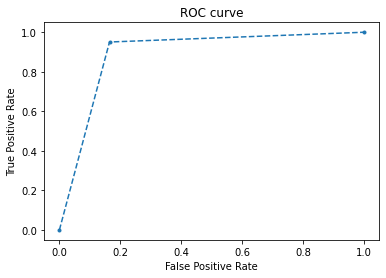

In [168]:
tpr,fpr,_=roc_curve(ytest,predlr)
plt.plot(tpr,fpr,linestyle='--',marker='.')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [169]:
# Now using 2nd model SVC

In [170]:
from sklearn.svm import SVC

In [171]:
svc=SVC()

In [172]:
# Finding best parameter using gridsearchcv

In [173]:
parameter={'kernel':['rbf','poly','linear']}
gscvsvc=GridSearchCV(svc,parameter)
gscvsvc.fit(xtrain,ytrain)
print(gscvsvc.best_params_)

{'kernel': 'rbf'}


In [174]:
svc=SVC(kernel='rbf')
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=13)
svc.fit(xtrain,ytrain)
predsvc=svc.predict(xtest)
svcacc=accuracy_score(ytest,predsvc)
print('At Random state 13 Accuracy is',svcacc*100)

At Random state 13 Accuracy is 78.125


In [411]:
# Now Checking Confusion matrix and classification report

In [175]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=13)
svc.fit(xtrain,ytrain)
predsvc=svc.predict(xtest)
svcacc=accuracy_score(ytest,predsvc)
print('At Random state 10 Accuracy is',svcacc*100)
print('F1 score is ',f1_score(ytest,predsvc,average='binary')*100)
print('ROC AUC SCORE is ',roc_auc_score(ytest,predsvc)*100)
print('Confusion matrix is \n',confusion_matrix(ytest,predsvc))
print('Classification report\n',classification_report(ytest,predsvc))

At Random state 10 Accuracy is 78.125
F1 score is  78.7878787878788
ROC AUC SCORE is  78.09814033442726
Confusion matrix is 
 [[60 19]
 [16 65]]
Classification report
               precision    recall  f1-score   support

           0       0.79      0.76      0.77        79
           1       0.77      0.80      0.79        81

    accuracy                           0.78       160
   macro avg       0.78      0.78      0.78       160
weighted avg       0.78      0.78      0.78       160



In [176]:
# Now Checking best cv and comparing it with accuracy

In [177]:
cvsvc=cross_val_score(svc,x,y,cv=7)
cvsvc_mean=cvsvc.mean()
print('At CV 7 cross val score is',cvsvc_mean*100,'with accuracy of svc',svcacc*100)

At CV 7 cross val score is 78.6501652360991 with accuracy of svc 78.125


In [178]:
# Now Plotting ROC curve for it

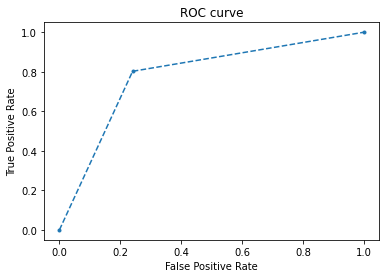

In [179]:
tpr,fpr,_=roc_curve(ytest,predsvc)
plt.plot(tpr,fpr,linestyle='--',marker='.')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [180]:
# Now using 3rd model which is KNeighbor

In [181]:
from sklearn.neighbors import KNeighborsClassifier

In [182]:
knn=KNeighborsClassifier()

In [183]:
# Finding Best Parameter using Grid Search CV

In [184]:
parameter={'algorithm':['auto','ball_tree','kd_tree','brute']}
gscvknn=GridSearchCV(knn,parameter)
gscvknn.fit(xtrain,ytrain)
print(gscvknn.best_params_)

{'algorithm': 'auto'}


In [185]:
knn=KNeighborsClassifier(algorithm='auto')

In [186]:
# Finding best Random State

In [187]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=13)
knn.fit(xtrain,ytrain)
predknn=knn.predict(xtest)
knnacc=accuracy_score(ytest,predknn)
print('At Random state 13 accuracy is ',knnacc*100)

At Random state 13 accuracy is  78.75


In [430]:
# Now Checking Confusion matrix and classification Report

In [188]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=13)
knn.fit(xtrain,ytrain)
predknn=knn.predict(xtest)
knnacc=accuracy_score(ytest,predknn)
print('At Random state 49 accuracy is ',knnacc*100)
print('F1 score is ',f1_score(ytest,predknn,average='binary')*100)
print('ROC AUC SCORE is ',roc_auc_score(ytest,predknn)*100)
print('Confusion matrix\n',confusion_matrix(ytest,predknn))
print('Classification report\n',classification_report(ytest,predknn))

At Random state 49 accuracy is  78.75
F1 score is  79.76190476190476
ROC AUC SCORE is  78.69979684325676
Confusion matrix
 [[59 20]
 [14 67]]
Classification report
               precision    recall  f1-score   support

           0       0.81      0.75      0.78        79
           1       0.77      0.83      0.80        81

    accuracy                           0.79       160
   macro avg       0.79      0.79      0.79       160
weighted avg       0.79      0.79      0.79       160



In [189]:
# Now Checking CV

In [190]:
cvknn=cross_val_score(knn,x,y,cv=7)
cvknn_mean=cvknn.mean()
print('At CV 7 cross val score is ',cvknn_mean*100,' with accuracy ',knnacc*100)

At CV 7 cross val score is  77.64544103621887  with accuracy  78.75


In [191]:
# Now plotting Its ROC curve

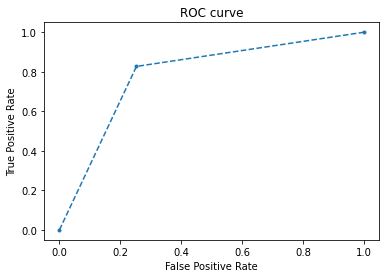

In [192]:
tpr,fpr,_=roc_curve(ytest,predknn)
plt.plot(tpr,fpr,linestyle='--',marker='.')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [193]:
# Now Using 4th model which is DecisionTree Classifier

In [194]:
from sklearn.tree import DecisionTreeClassifier

In [195]:
dtc=DecisionTreeClassifier()

In [196]:
# Finding best Parameters

In [197]:
parameter={'criterion':['gini','entropy','log_loss'],'max_features':['auto','sqrt','log2']}
gscvdtc=GridSearchCV(dtc,parameter)
gscvdtc.fit(xtrain,ytrain)
print(gscvdtc.best_params_)

{'criterion': 'gini', 'max_features': 'log2'}


In [472]:
# Now finding accuracy and checking classification report and confusion matrix

In [231]:
dtc=DecisionTreeClassifier(criterion='gini',max_features='log2')
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=13)
dtc.fit(xtrain,ytrain)
preddtc=dtc.predict(xtest)
dtcacc=accuracy_score(ytest,preddtc)
print('At Random state 13 Accuracy is ',dtcacc*100)
print('ROC AUC SCORE is ',roc_auc_score(ytest,preddtc)*100)
print('F1 score is ',f1_score(ytest,preddtc,average='binary')*100)
print('Confusion matrix\n',confusion_matrix(ytest,preddtc))
print('Classification report\n',classification_report(ytest,preddtc))

At Random state 13 Accuracy is  83.75
ROC AUC SCORE is  83.76308798249727
F1 score is  83.74999999999999
Confusion matrix
 [[67 12]
 [14 67]]
Classification report
               precision    recall  f1-score   support

           0       0.83      0.85      0.84        79
           1       0.85      0.83      0.84        81

    accuracy                           0.84       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.84      0.84      0.84       160



In [232]:
# Now Checking it with cv

In [233]:
cvdtc=cross_val_score(dtc,x,y,cv=7)
cvdtc_mean=cvdtc.mean()
print('At CV 7 cross val score is ',cvdtc_mean*100,'with Accuracy ',dtcacc*100)

At CV 7 cross val score is  78.40175660389913 with Accuracy  83.75


In [234]:
# Now plotting Roc curve

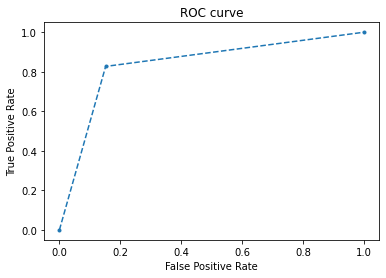

In [235]:
tpr,fpr,_=roc_curve(ytest,preddtc)
plt.plot(tpr,fpr,linestyle='--',marker='.')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [236]:
# Now Using 5th model Random Forest Classifier

In [237]:
from sklearn.ensemble import RandomForestClassifier

In [238]:
rf=RandomForestClassifier()

In [239]:
# Finding BestParameter using GridSearchCV

In [240]:
parameter={'criterion':['gini','entropy','log_loss'],'max_features':['sqrt','log2','None']}
gscvrf=GridSearchCV(rf,parameter)
gscvrf.fit(xtrain,ytrain)
print(gscvrf.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt'}


In [566]:
# Now checking Accuracy score , classification report, confussion matrix,f1 score and roc_auc_score

In [241]:
rf=RandomForestClassifier(criterion='gini',max_features='sqrt')
rf.fit(xtrain,ytrain)
predrf=rf.predict(xtest)
rfacc=accuracy_score(ytest,predrf)
print('Accuracy score is ',rfacc*100)
print('ROC AUC SCORE is ',roc_auc_score(ytest,predrf)*100)
print('F1 score is ',f1_score(ytest,predrf,average='binary')*100)
print('Confusion matrix\n',confusion_matrix(ytest,predrf))
print('Classification report\n',classification_report(ytest,predrf))

Accuracy score is  85.625
ROC AUC SCORE is  85.58368495077355
F1 score is  86.22754491017963
Confusion matrix
 [[65 14]
 [ 9 72]]
Classification report
               precision    recall  f1-score   support

           0       0.88      0.82      0.85        79
           1       0.84      0.89      0.86        81

    accuracy                           0.86       160
   macro avg       0.86      0.86      0.86       160
weighted avg       0.86      0.86      0.86       160



In [527]:
# Now Checking it with cv

In [242]:
cvrf=cross_val_score(rf,x,y,cv=7)
cvrf_mean=cvrf.mean()
print('At CV 7 cross val score is ',cvrf_mean*100,' with accuracy ',rfacc*100)

At CV 7 cross val score is  84.0552709206645  with accuracy  85.625


In [243]:
# Now plotting ROC curve

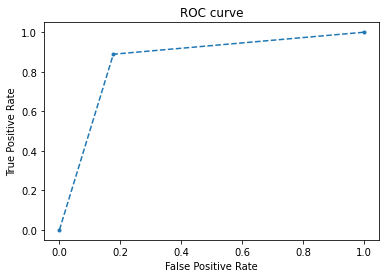

In [245]:
tpr,fpr,_=roc_curve(ytest,predrf)
plt.plot(tpr,fpr,linestyle='--',marker='.')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [246]:
# Now using 6th model which is Gradient Boosting classifier

In [247]:
from sklearn.ensemble import GradientBoostingClassifier

In [248]:
gbc=GradientBoostingClassifier()

In [249]:
# Finding Best arameter using GridSearchCV

In [250]:
parameter={'loss':['log_loss','deviance','exponential'],'criterion':['friedman_mse','squared_error','mse'],'max_features':['auto','sqrt','log2']}
gscvgbc=GridSearchCV(gbc,parameter)
gscvgbc.fit(xtrain,ytrain)
print(gscvgbc.best_params_)

{'criterion': 'squared_error', 'loss': 'exponential', 'max_features': 'log2'}


In [252]:
gbc=GradientBoostingClassifier(criterion='squared_error',loss='exponential',max_features='log2')
gbc.fit(xtrain,ytrain)
predgbc=gbc.predict(xtest)
gbcacc=accuracy_score(ytest,predgbc)
print('Accuracy is ',gbcacc*100)
print('f1 score is ',f1_score(ytest,predgbc,average='binary')*100)
print('ROC AUC Score is ',roc_auc_score(ytest,predgbc)*100)
print('Confusion matrix\n',confusion_matrix(ytest,predgbc))
print('Classification report\n',classification_report(ytest,predgbc))

Accuracy is  84.375
f1 score is  85.20710059171599
ROC AUC Score is  84.31786216596343
Confusion matrix
 [[63 16]
 [ 9 72]]
Classification report
               precision    recall  f1-score   support

           0       0.88      0.80      0.83        79
           1       0.82      0.89      0.85        81

    accuracy                           0.84       160
   macro avg       0.85      0.84      0.84       160
weighted avg       0.85      0.84      0.84       160



In [253]:
# Now Checking best CV

In [254]:
cvgbc=cross_val_score(gbc,x,y,cv=7)
cvgbc_mean=cvgbc.mean()
print('At cv 7 cross val score is ',cvgbc_mean*100,' with accuracy ',gbcacc*100)

At cv 7 cross val score is  80.17055914121588  with accuracy  84.375


In [255]:
# Now Plotting its ROC curve

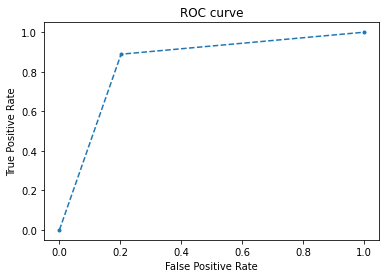

In [256]:
tpr,fpr,_=roc_curve(ytest,predgbc)
plt.plot(tpr,fpr,linestyle='--',marker='.')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# SAVING THE BEST MODEL LOGISTIC REGRESSION BECAUSE IT HAS HIGHEST ACCURACY SCORE , HIGHEST F1 SCORE , HIGHEST AUC ROC SCORE AND LESS FALSE NEGATIVE AND FALSE POSITIVE IN CONFUSION MATRIX

In [257]:
import pickle as pkl

In [258]:
# Saving the model

In [259]:
filename='loanapproval.pkl'
pkl.dump(lr,open(filename,'wb'))

In [260]:
# Loading the model and checking its score

In [261]:
output=pkl.load(open('loanapproval.pkl','rb'))
result=output.score(xtest,ytest)
result*100

89.375

In [262]:
#Testing the model

In [265]:
Loan_Approval_model=pd.DataFrame([output.predict(xtest)[:],(predlr)[:]],index=['Actual','Predicted'])
Loan_Approval_model

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
Actual,1,1,1,0,0,1,0,0,1,0,...,1,1,1,1,0,1,1,1,0,0
Predicted,1,1,1,0,0,1,0,0,1,0,...,1,1,1,1,0,1,1,1,0,0


In [266]:
# This is our final Model

In [267]:
# Thank you